#TASK 05


Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_USA = pd.read_csv('/content/US_Accidents_Dec20_Updated.csv')

In [75]:
df_USA

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5358,A-5359,2,2018-05-05 13:12:16,2018-05-05 13:41:32,47.553432,-122.334221,47.553432,-122.334221,0.000,Accident on 1st Ave at Lucile St.,...,False,False,False,False,True,False,Day,Day,Day,Day
5359,A-5360,2,2020-11-20 05:34:00,2020-11-20 08:53:08,41.811514,-124.108847,41.811636,-124.101562,0.375,199 SB JSO WALKER RD. [Notification] [CHP]-Pro...,...,False,False,False,False,False,False,Night,Night,Night,Night
5360,A-5361,3,2016-12-06 06:01:22,2016-12-06 06:30:40,28.054705,-82.454872,NaN,NaN,0.010,Accident on I-275 Southbound at Exit 51 FL-582...,...,False,False,False,False,True,False,Night,Night,Night,Day
5361,A-5362,4,2017-09-08 16:36:06,2017-09-08 22:36:06,35.158249,-78.717010,35.202311,-78.669936,4.042,Closed between NC-82/Exit 65 and Wade-Stedman ...,...,False,False,False,False,False,False,Day,Day,Day,Day


##Data cleaning and preparation

In [101]:
df_USA.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour'],
      dtype='object')

In [76]:
# Check for missing values in relevant columns
missing_values = df_USA[['Start_Time', 'End_Time', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Speed(mph)']].isnull().sum()
print("Missing Values:")
print(missing_values)

# Decide whether to impute or drop missing values based on analysis requirements
# Example: Drop rows with missing values in 'Start_Time' and 'End_Time'
df_USA.dropna(subset=['Start_Time', 'End_Time'], inplace=True)


Missing Values:
Start_Time             0
End_Time               0
Weather_Timestamp     77
Temperature(F)       128
Wind_Speed(mph)      540
dtype: int64


In [77]:
# Convert columns to datetime format
df_USA['Start_Time'] = pd.to_datetime(df_USA['Start_Time'])
df_USA['End_Time'] = pd.to_datetime(df_USA['End_Time'])
df_USA['Weather_Timestamp'] = pd.to_datetime(df_USA['Weather_Timestamp'])


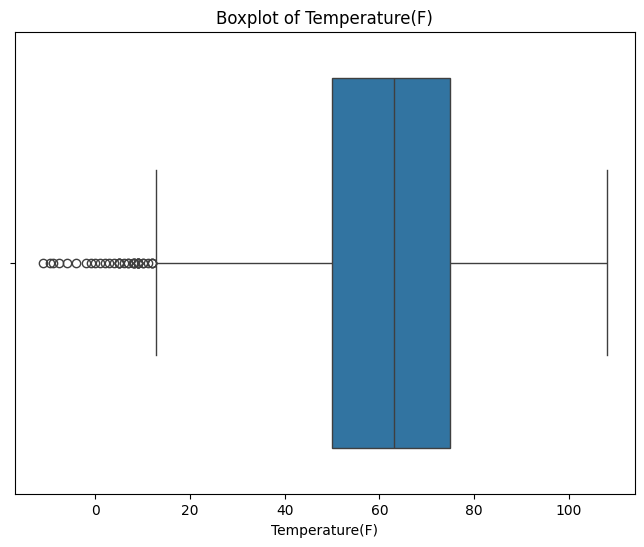

In [78]:
# Identify outliers in numerical columns
# Example: Check for outliers in 'Temperature(F)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_USA['Temperature(F)'])
plt.title('Boxplot of Temperature(F)')
plt.xlabel('Temperature(F)')
plt.show()

# Handle outliers as per analysis requirements (e.g., remove or cap outliers)
# Example: Cap outliers in 'Temperature(F)' column
temperature_median = df_USA['Temperature(F)'].median()
temperature_std = df_USA['Temperature(F)'].std()
upper_bound = temperature_median + 3 * temperature_std
df_USA['Temperature(F)'] = df_USA['Temperature(F)'].apply(lambda x: upper_bound if x > upper_bound else x)


In [79]:
# Select only the relevant columns for analysis
relevant_columns = ['ID', 'Severity', 'Start_Time', 'End_Time', 'Temperature(F)', 'Wind_Speed(mph)', 'Weather_Condition']
df_USA_filtered = df_USA[relevant_columns].copy()


##Exploratory Data Analysis (EDA):

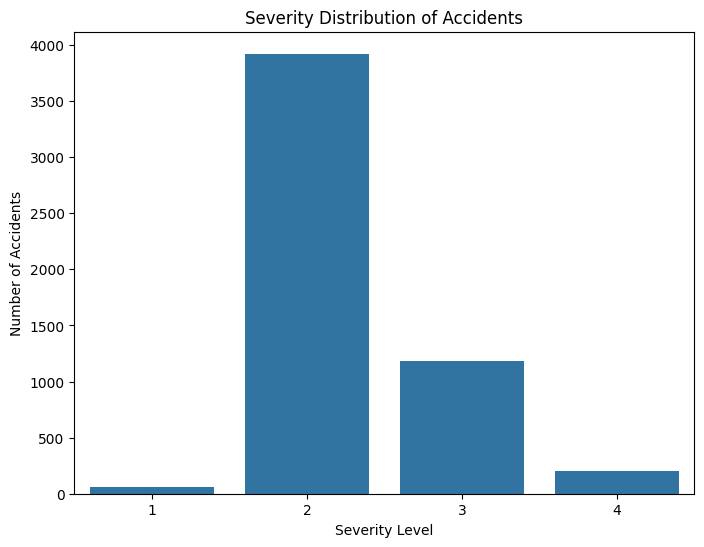

In [80]:
# Analyze Severity distribution
severity_distribution = df_USA['Severity'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=severity_distribution.index, y=severity_distribution.values)
plt.title('Severity Distribution of Accidents')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.show()

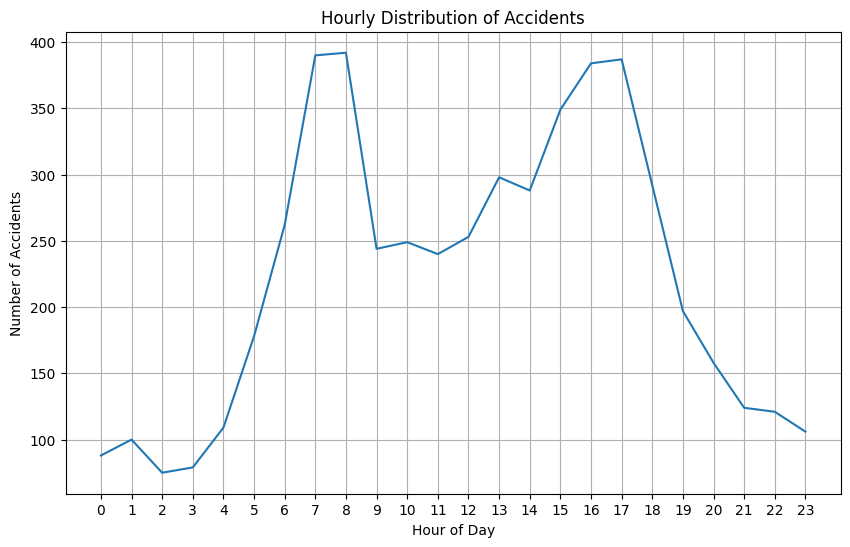

In [81]:
# Explore Time of Day patterns
df_USA['Start_Time'] = pd.to_datetime(df_USA['Start_Time'])
df_USA['Hour'] = df_USA['Start_Time'].dt.hour
hourly_accidents = df_USA.groupby('Hour').size()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_accidents.index, y=hourly_accidents.values)
plt.title('Hourly Distribution of Accidents')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(24))
plt.grid(True)
plt.show()

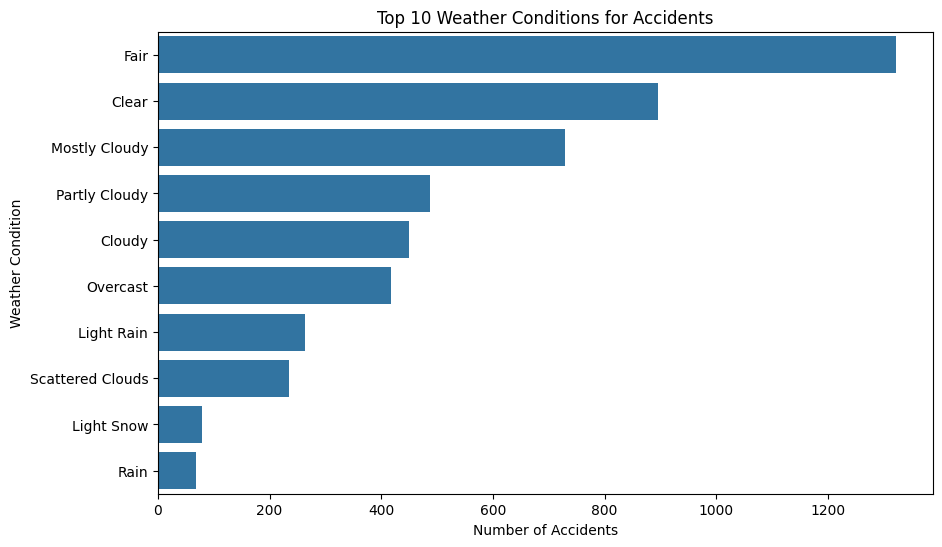

In [82]:
# Investigate Weather conditions
weather_conditions = df_USA['Weather_Condition'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_conditions.values, y=weather_conditions.index, orient='h')
plt.title('Top 10 Weather Conditions for Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

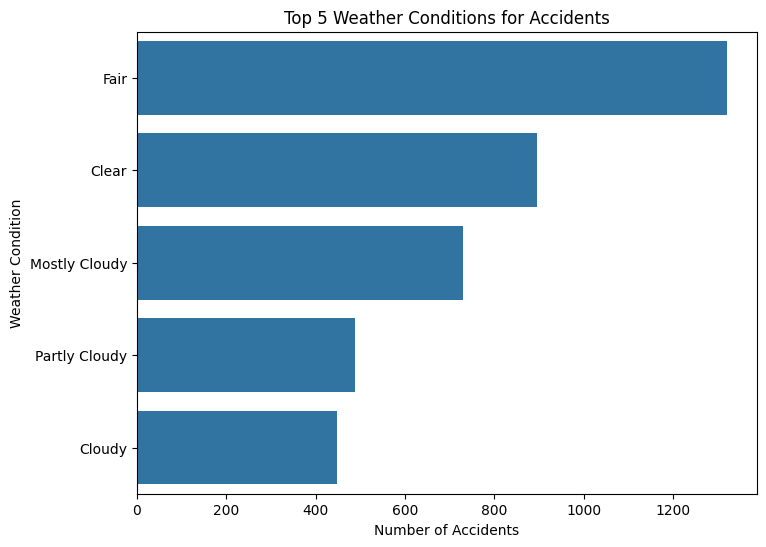

In [86]:
# Assess Road conditions
road_conditions = df_USA['Weather_Condition'].value_counts().head(5)
plt.figure(figsize=(8, 6))
sns.barplot(x=road_conditions.values, y=road_conditions.index, orient='h')
plt.title('Top 5 Weather Conditions for Accidents')  # Update the title accordingly
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')  # Update to reflect the actual data being plotted
plt.show()


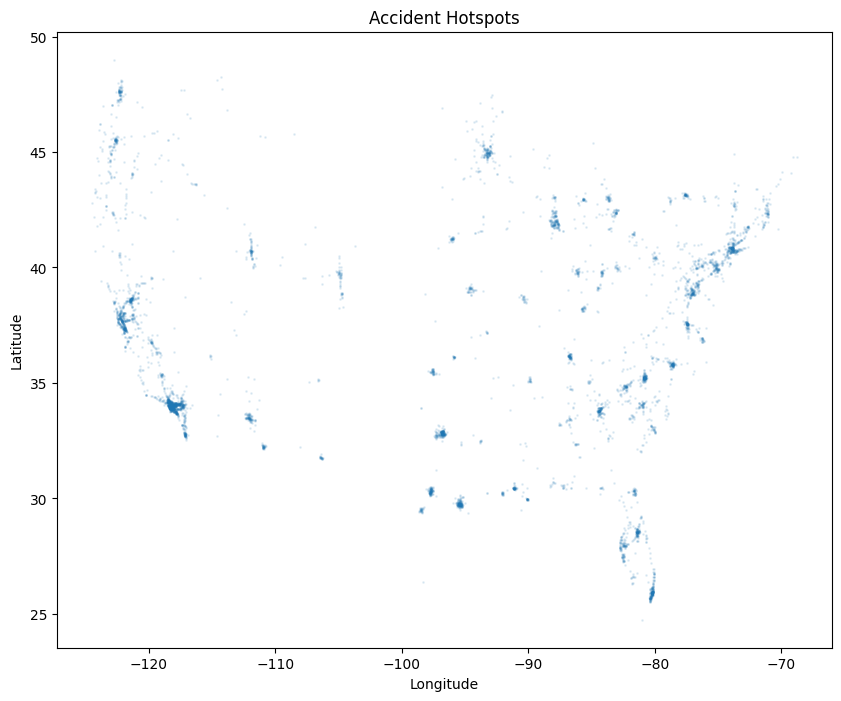

In [87]:
# Identify Accident hotspots (geospatial visualization)
# Assuming you have latitude and longitude columns: 'Start_Lat' and 'Start_Lng'
plt.figure(figsize=(10, 8))
plt.scatter(df_USA['Start_Lng'], df_USA['Start_Lat'], alpha=0.1, s=1)
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check data types of columns
print(df_USA.dtypes)

ID                               object
Severity                          int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Distance(mi)                    float64
Description                      object
Number                          float64
Street                           object
Side                             object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp        datetime64[ns]
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64


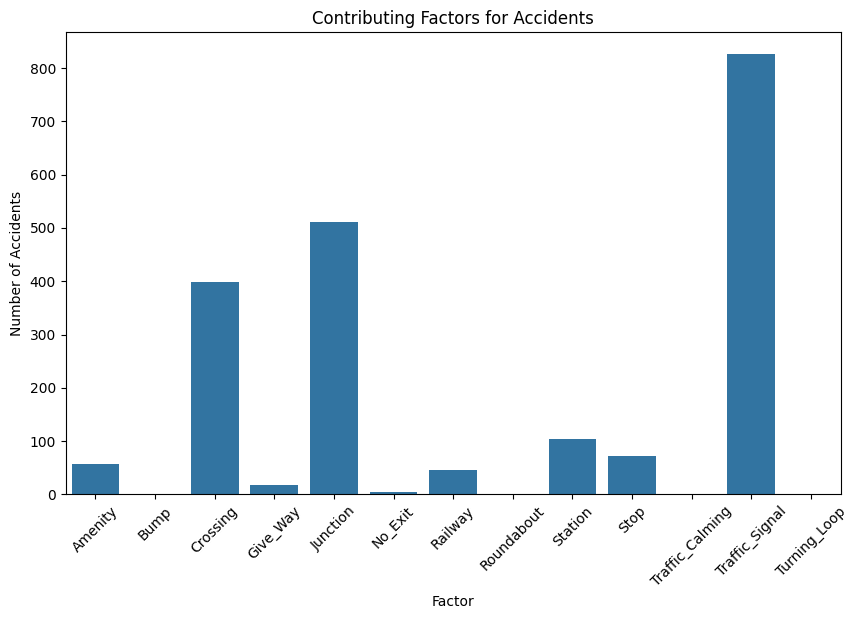

In [93]:

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=contributing_factors.index, y=contributing_factors.values)
plt.title('Contributing Factors for Accidents')
plt.xlabel('Factor')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


##Visualization:

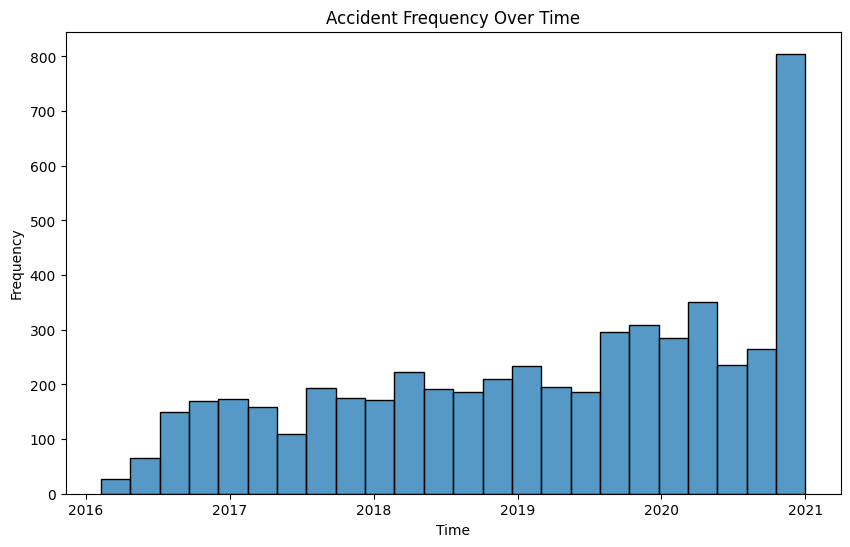

In [94]:
# Plot accident frequency over time
plt.figure(figsize=(10, 6))
sns.histplot(df_USA['Start_Time'], bins=24)
plt.title('Accident Frequency Over Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

<ipython-input-97-66ed3e00b8e4>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_USA['Start_Lng'], y=df_USA['Start_Lat'], cmap='Reds', shade=True)


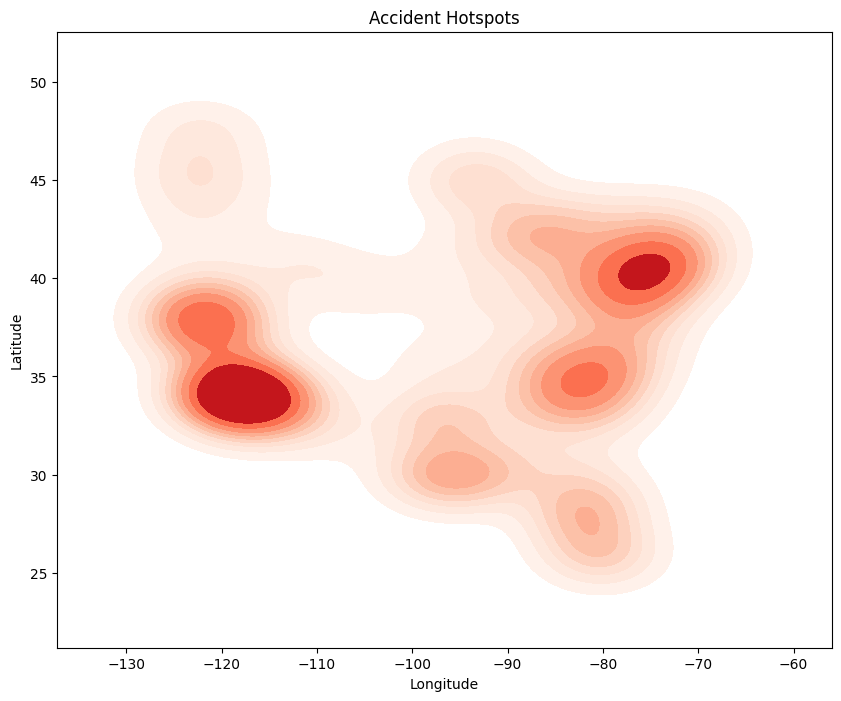

In [97]:
import seaborn as sns

# Generate heatmap for accident hotspots
plt.figure(figsize=(10, 8))
sns.kdeplot(x=df_USA['Start_Lng'], y=df_USA['Start_Lat'], cmap='Reds', shade=True)
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



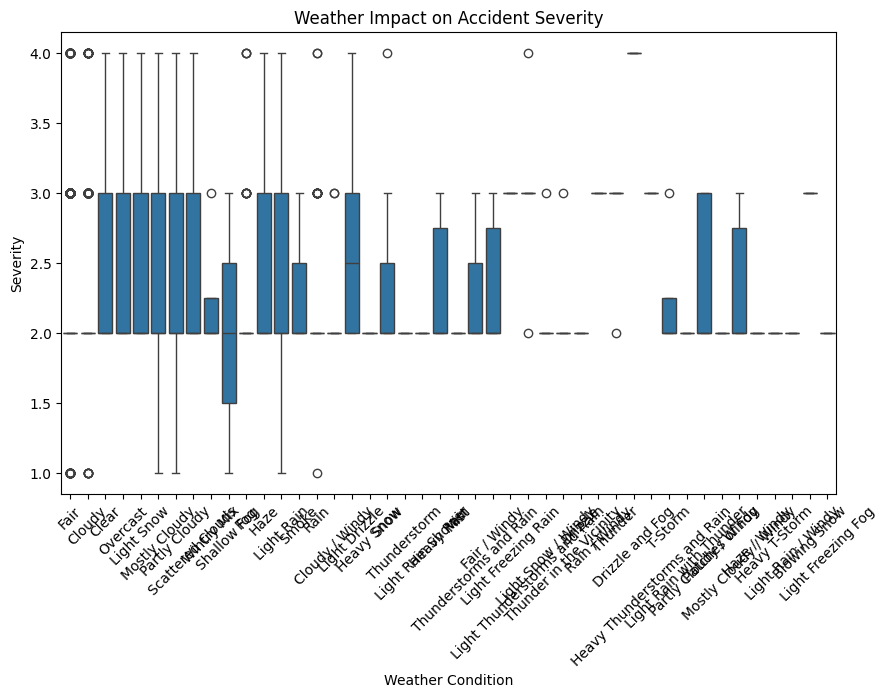

In [98]:
# Visualize weather impact
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather_Condition', y='Severity', data=df_USA)
plt.title('Weather Impact on Accident Severity')
plt.xlabel('Weather Condition')
plt.ylabel('Severity')
plt.xticks(rotation=45)
plt.show()

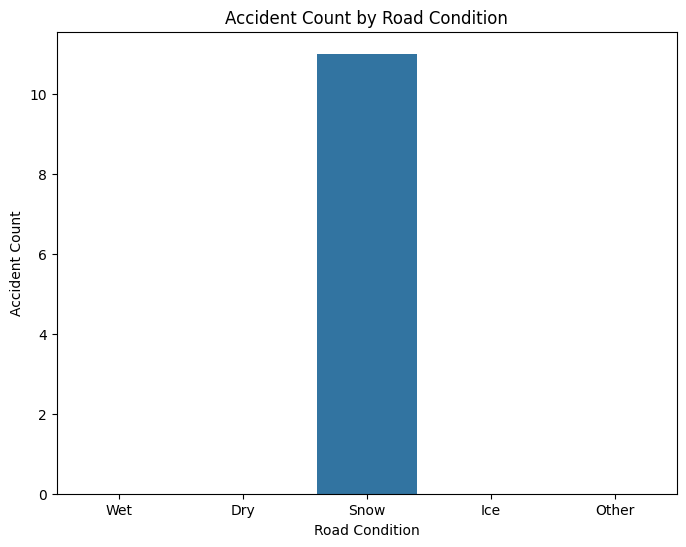

In [102]:
# Create charts for road conditions
road_conditions = ['Wet', 'Dry', 'Snow', 'Ice', 'Other']
accident_counts = [df_USA[df_USA['Weather_Condition'] == condition].shape[0] for condition in road_conditions]

plt.figure(figsize=(8, 6))
sns.barplot(x=road_conditions, y=accident_counts)
plt.title('Accident Count by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Accident Count')
plt.show()